Accuracy: 96.00


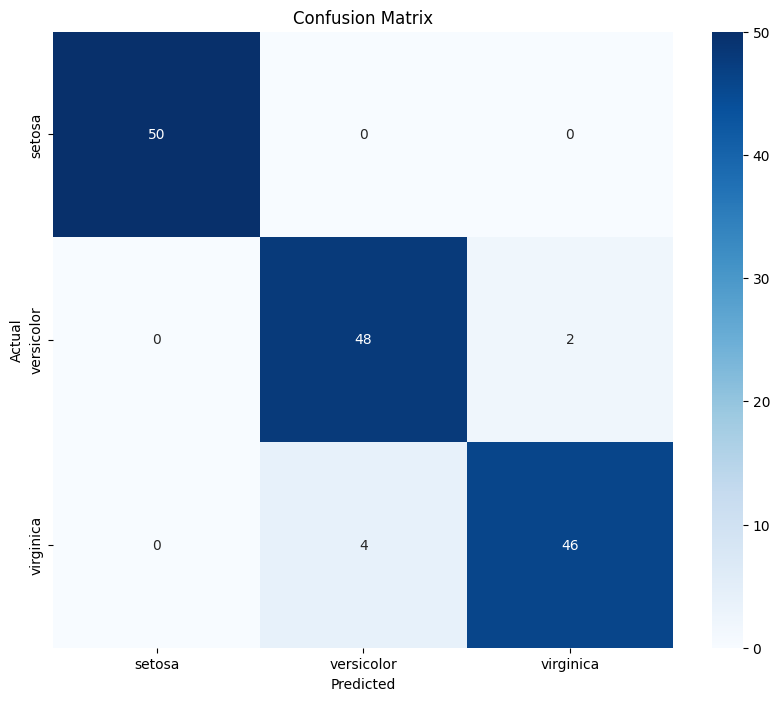

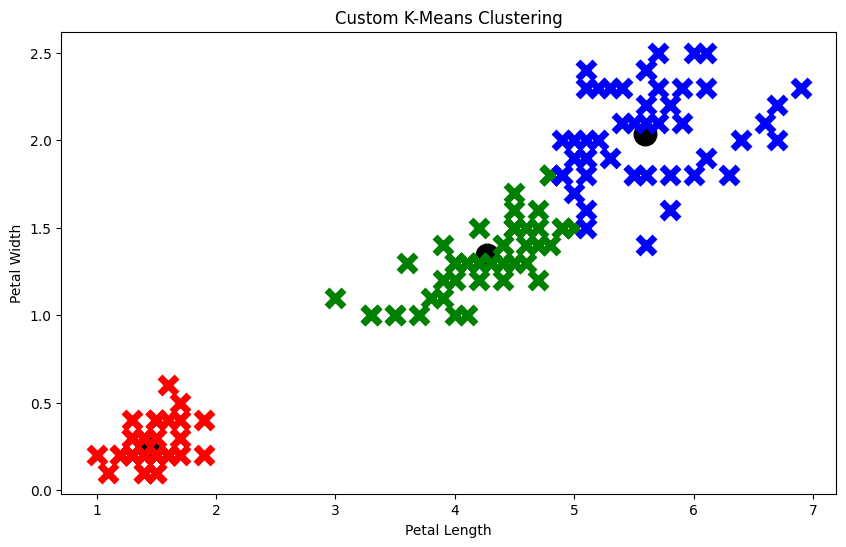

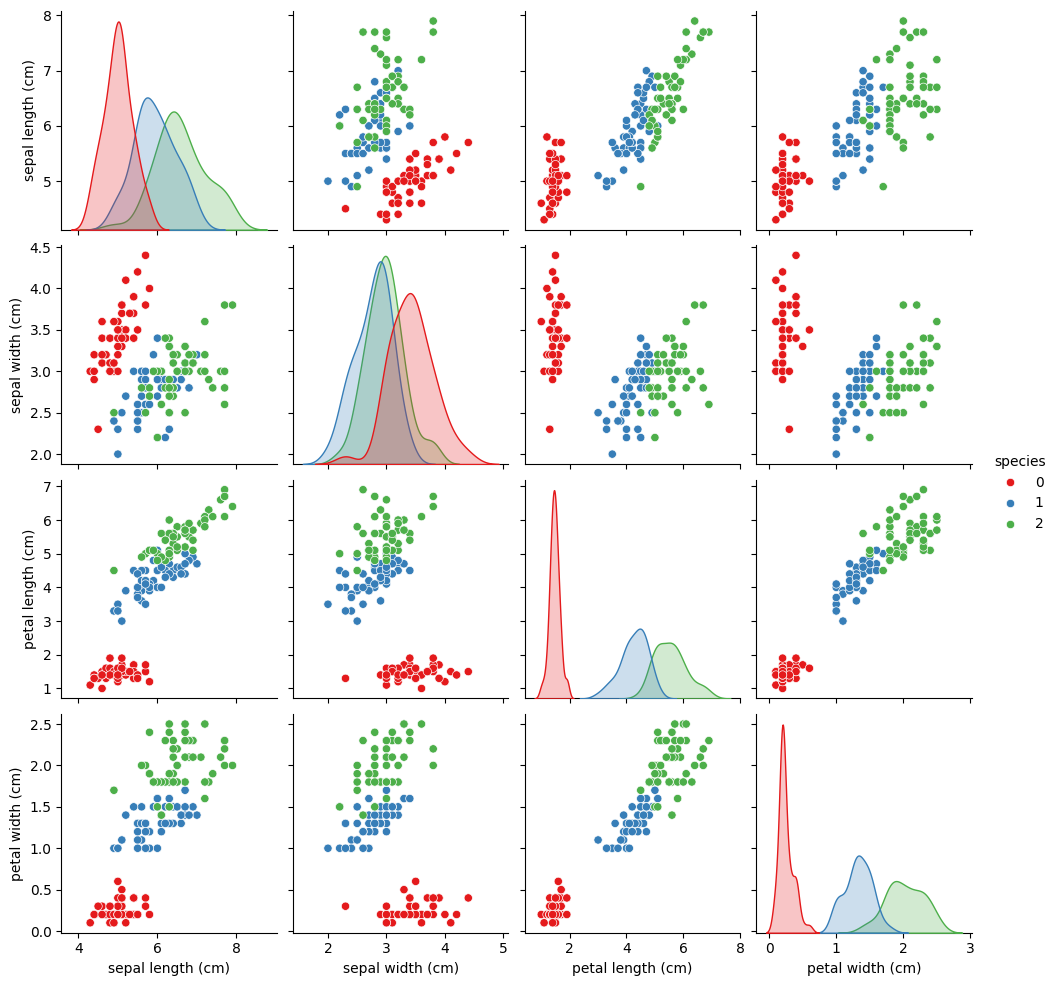

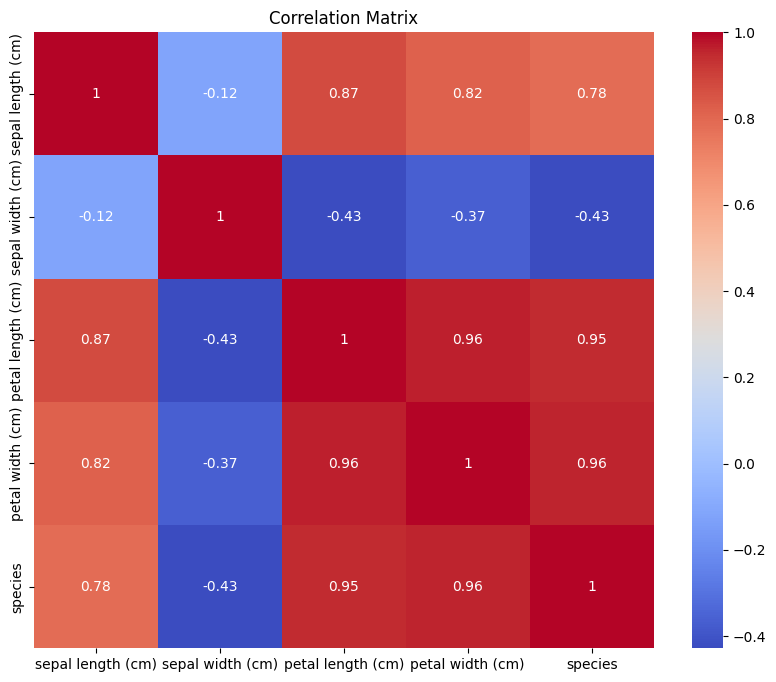

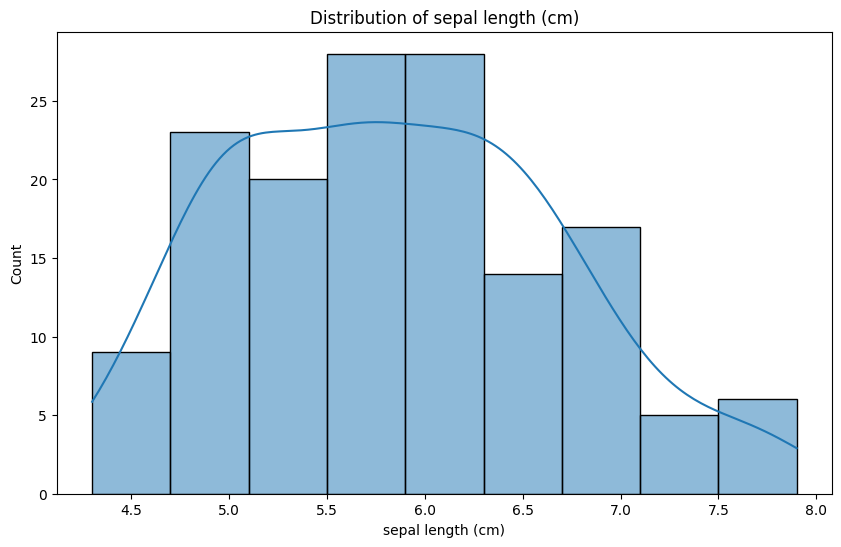

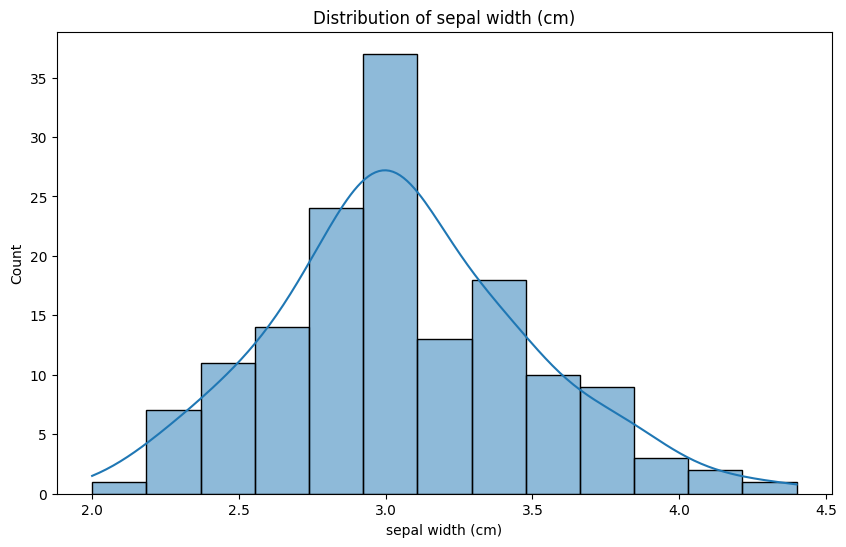

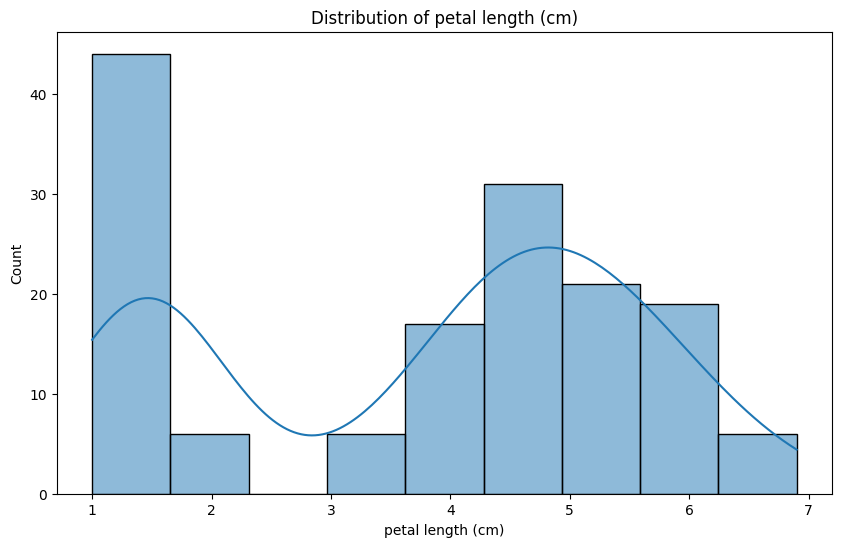

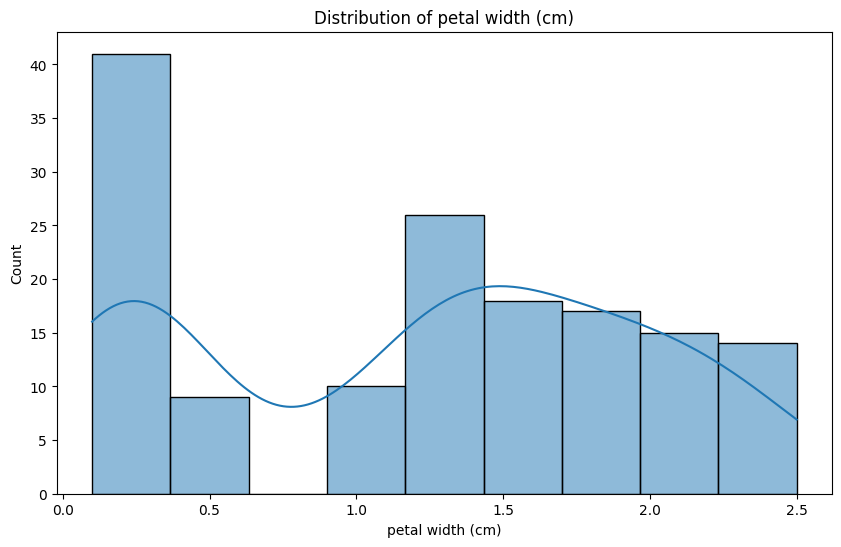

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

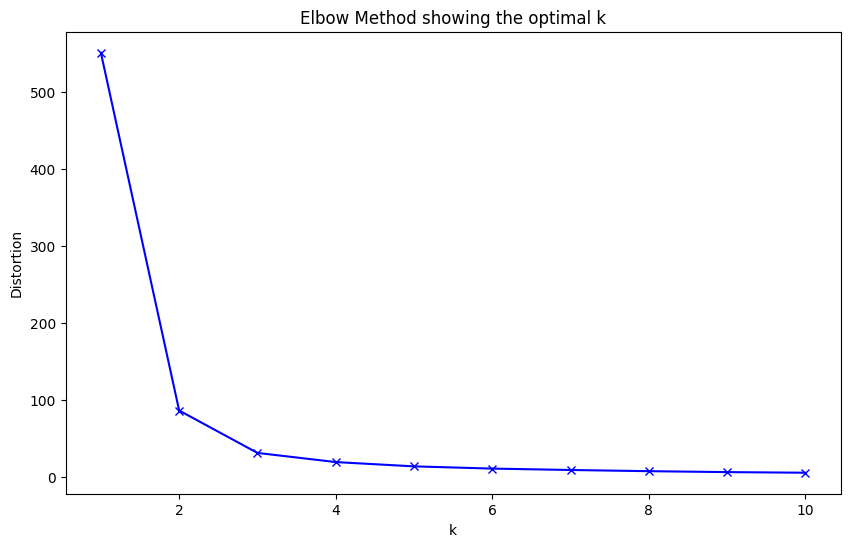

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import mode

# Load the Iris dataset
iris = load_iris()
x = iris.data
x2 = x[:, [2, 3]]  # Using petal width and petal length

# Custom K-Means implementation
class K_Means:
    def __init__(self, k=3, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self, data):
        # Initialize centroids randomly
        self.centroids = {i: data[np.random.choice(data.shape[0])] for i in range(self.k)}

        for i in range(self.max_iter):
            self.classifications = {i: [] for i in range(self.k)}

            for featureset in data:
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                if self.classifications[classification]:  # Check if there are points in this cluster
                    self.centroids[classification] = np.average(self.classifications[classification], axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid - original_centroid) / original_centroid * 100.0) > self.tol:
                    optimized = False

            if optimized:
                break

    def predict(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

clf = K_Means()
clf.fit(x2)

# Predict clusters
predictions = np.array([clf.predict(x) for x in x2])

# Map clusters to true labels
labels = np.zeros_like(predictions)
for i in range(3):
    mask = (predictions == i)
    if np.any(mask):
        labels[mask] = mode(iris.target[mask])[0]

# Calculate accuracy
accuracy = accuracy_score(iris.target, labels)
print(f'Accuracy: {accuracy * 100:.2f}')

# Compute confusion matrix
conf_matrix = confusion_matrix(iris.target, labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Scatter plot for custom K-Means
colors = 10 * ['r', 'g', 'b', 'c', 'k']

plt.figure(figsize=(10, 6))
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1], marker='o', color='k', s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker='x', color=color, s=150, linewidths=5)
plt.title('Custom K-Means Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

# Using Seaborn for additional visualizations
iris_df = pd.DataFrame(x, columns=iris.feature_names)
iris_df['species'] = iris.target

# Pairplot to visualize pairwise relationships
sns.pairplot(iris_df, hue='species', palette='Set1')
plt.show()

# Heatmap to show correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(iris_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution plots for each feature
for feature in iris.feature_names:
    plt.figure(figsize=(10, 6))
    sns.histplot(iris_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Elbow method to determine the optimal number of clusters
def plot_elbow_method(data):
    distortions = []
    K = range(1, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('Elbow Method showing the optimal k')
    plt.show()

plot_elbow_method(x2)


Accuracy: 0.8200
Confusion Matrix:
[[50  0  0]
 [ 0 38 12]
 [ 0 15 35]]


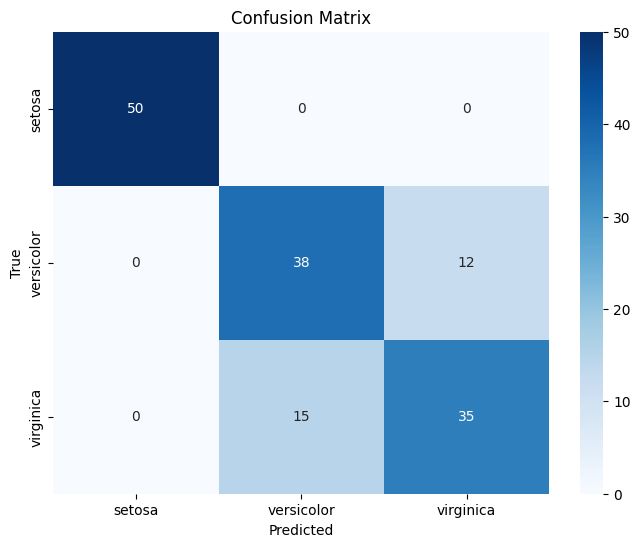

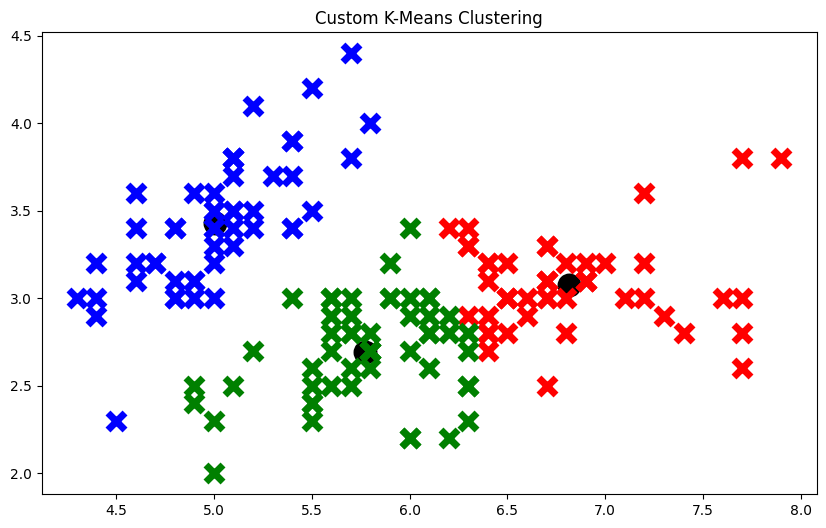

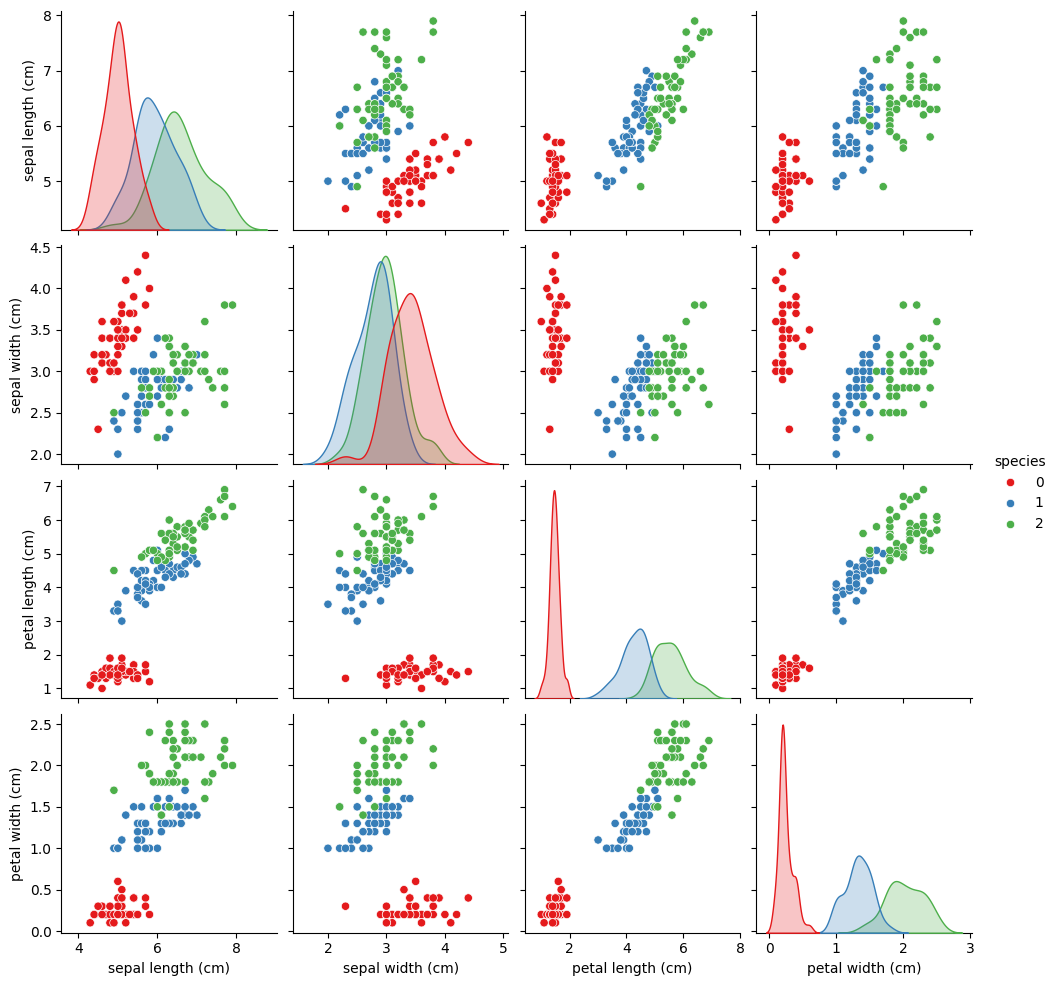

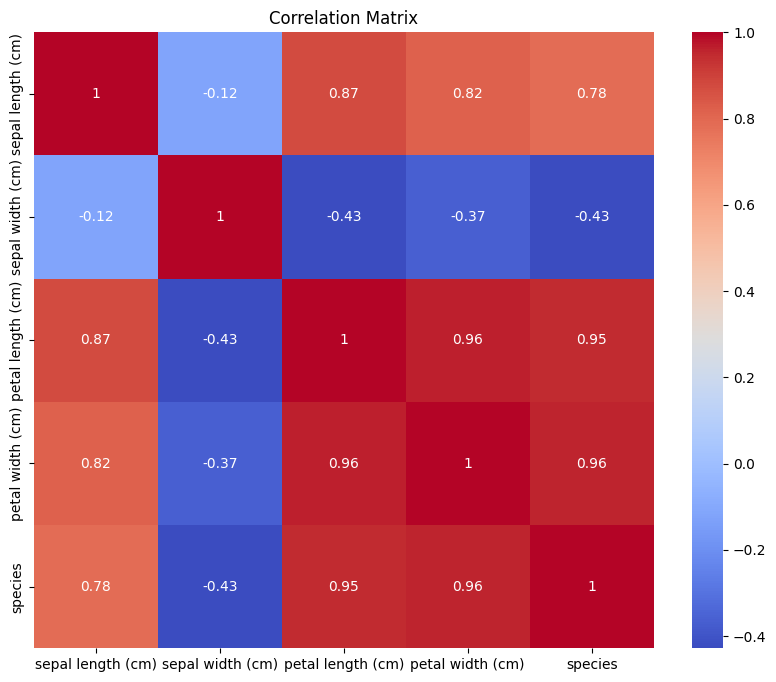

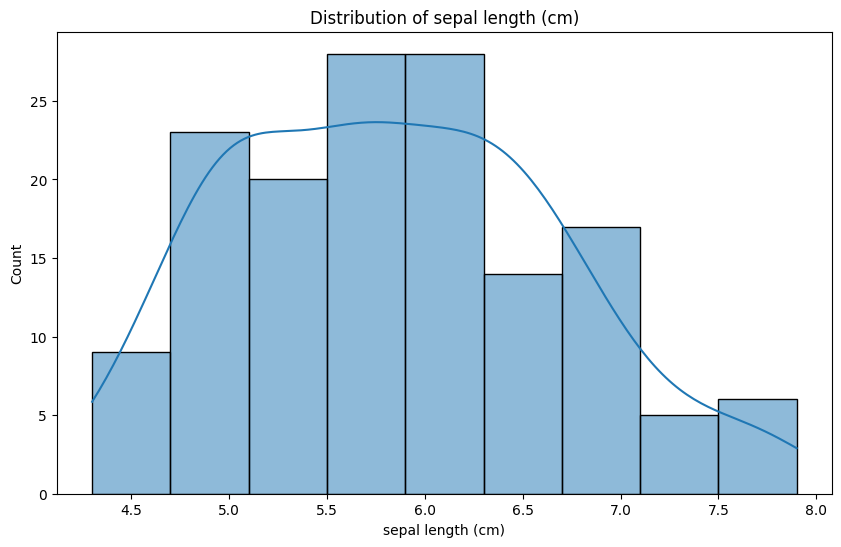

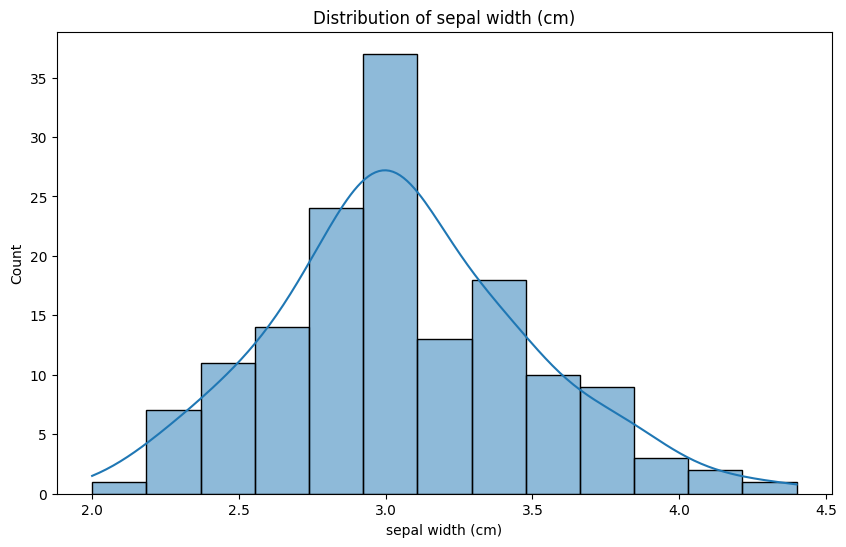

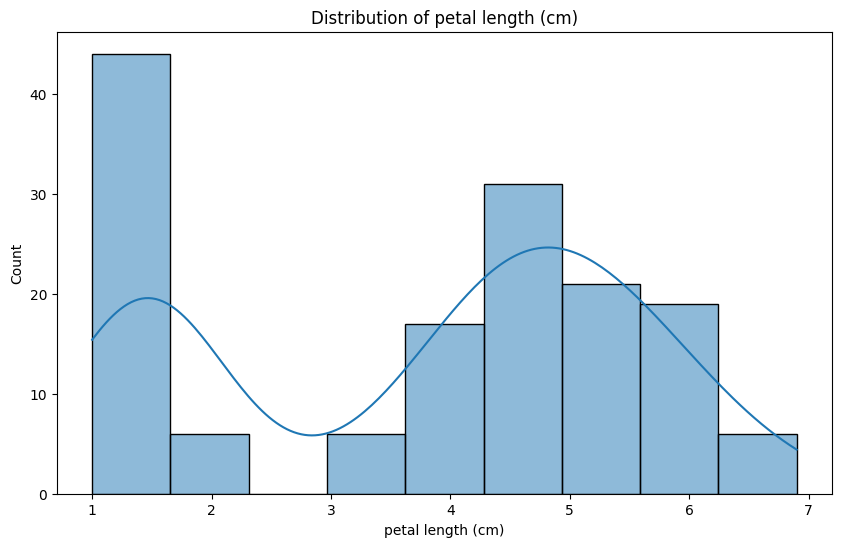

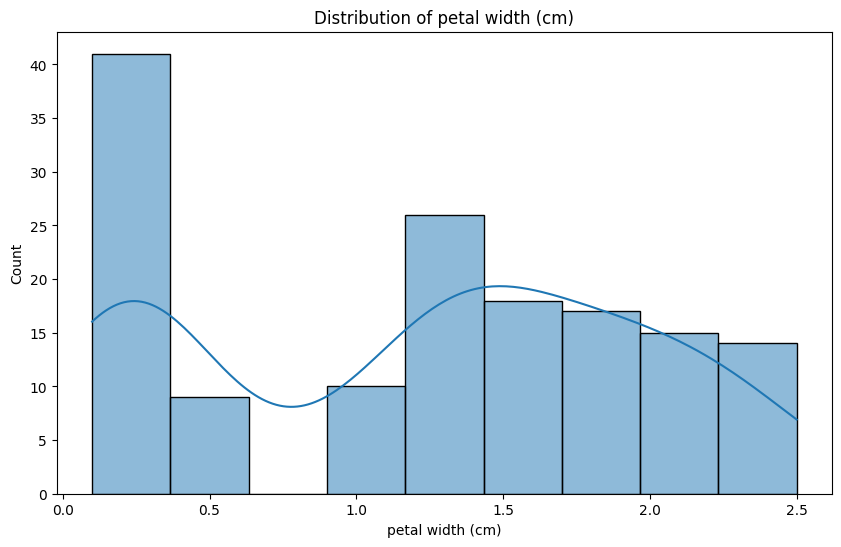

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

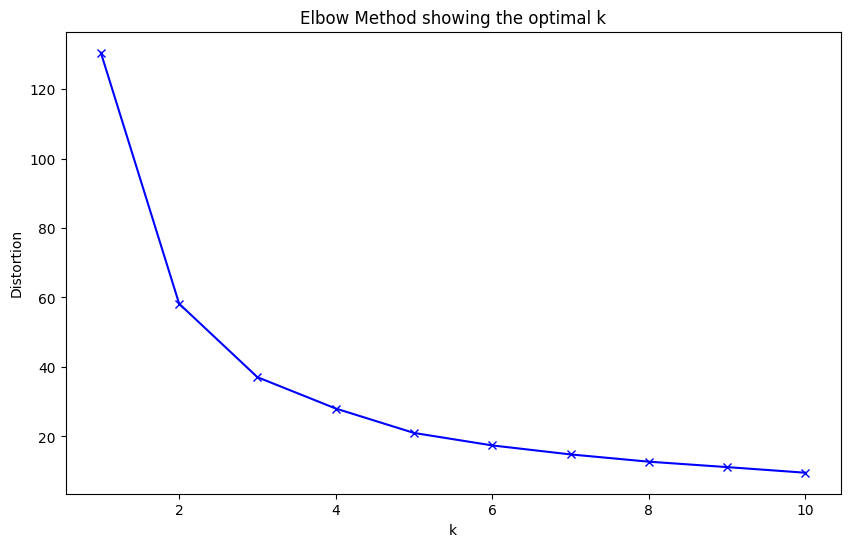

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
x = iris.data
y = iris.target  # True labels
x1 = x[:, [0, 1]]
x2 = x[:, [2, 3]]
x3 = x[:, [0, 2]]
x4 = x[:, [1, 3]]

# Custom K-Means implementation
class K_Means:
    def __init__(self, k=3, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self, data):
        self.centroids = {i: data[i] for i in range(self.k)}

        for i in range(self.max_iter):
            self.classifications = {i: [] for i in range(self.k)}

            for featureset in data:
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid - original_centroid) / original_centroid * 100.0) > self.tol:
                    optimized = False

            if optimized:
                break

    def predict(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

    def predict_all(self, data):
        return np.array([self.predict(featureset) for featureset in data])

# Fit the custom K-Means
clf = K_Means()
clf.fit(x1)
predicted_labels = clf.predict_all(x1)

# Calculate accuracy and confusion matrix
# Map cluster labels to true labels
def map_clusters_to_labels(predicted_labels, true_labels):
    label_mapping = {}
    for cluster in np.unique(predicted_labels):
        cluster_labels = true_labels[predicted_labels == cluster]
        most_common_label = np.bincount(cluster_labels).argmax()
        label_mapping[cluster] = most_common_label
    return label_mapping

label_mapping = map_clusters_to_labels(predicted_labels, y)
mapped_labels = np.array([label_mapping[label] for label in predicted_labels])

accuracy = accuracy_score(y, mapped_labels)
conf_matrix = confusion_matrix(y, mapped_labels)

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Scatter plot for custom K-Means
colors = 10 * ['r', 'g', 'b', 'c', 'k']

plt.figure(figsize=(10, 6))
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1], marker='o', color='k', s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker='x', color=color, s=150, linewidths=5)
plt.title('Custom K-Means Clustering')
plt.show()

# Using Seaborn for additional visualizations
iris_df = pd.DataFrame(x, columns=iris.feature_names)
iris_df['species'] = iris.target

# Pairplot to visualize pairwise relationships
sns.pairplot(iris_df, hue='species', palette='Set1')
plt.show()

# Heatmap to show correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(iris_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution plots for each feature
for feature in iris.feature_names:
    plt.figure(figsize=(10, 6))
    sns.histplot(iris_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Elbow method to determine the optimal number of clusters
def plot_elbow_method(data):
    distortions = []
    K = range(1, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('Elbow Method showing the optimal k')
    plt.show()

plot_elbow_method(x1)
